In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [33]:
# Read in the image and print out some stats
image = mpimg.imread('test.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


### Color seletion

In [12]:
def color_threshold(img, rgb_threshold):
    tmp = np.copy(img)
    thresholds = (img[:,:,0] < rgb_threshold[0]) \
            | (img[:,:,1] < rgb_threshold[1]) \
            | (img[:,:,2] < rgb_threshold[2])
    tmp[thresholds] = [0,0,0]
    return tmp

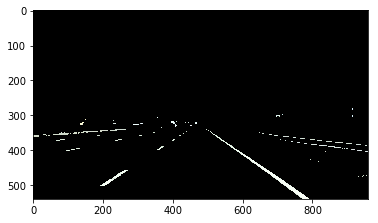

In [28]:
image0 = color_threshold(image, [200,200,200])
plt.imshow(image0)
# plt.show()

### Region mask

In [13]:
def triangle_region_mask(img, left_bottom, right_bottom, apex):
    tmp = np.zeros_like(img)
    
    fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
    fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
    fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
    
    XX, YY = np.meshgrid(np.arange(0, img.shape[1]), np.arange(0, img.shape[0]))
    region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
            
    tmp[region_thresholds] = img[region_thresholds]
    return tmp

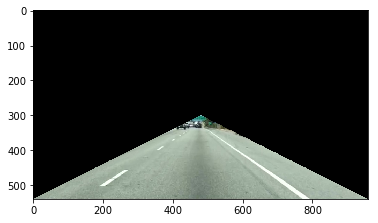

In [29]:
image1 = triangle_region_mask(image, left_bottom, right_bottom, apex)
plt.imshow(image1)
# plt.show()

#### 先做区域分割，再做颜色分割

In [30]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [959, 539]
apex = [480, 300]

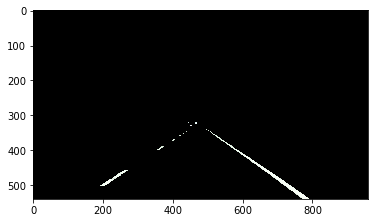

In [31]:
image1 = triangle_region_mask(image, left_bottom, right_bottom, apex)
image2 = color_threshold(a1, [200,200,200])
plt.imshow(image2)
# plt.show()

#### 映射到原图

In [25]:
index = (image2[:,:,0]>0) | (image2[:,:,1]>0) | (image2[:,:,2]>0)

In [26]:
image_copy = np.copy(image)
image_copy[index] = [255,0,0]

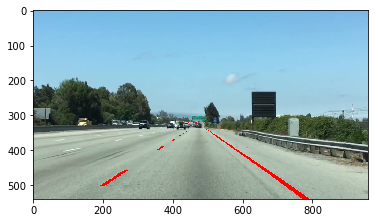

In [27]:
plt.imshow(image_copy)
# plt.show()

### Canny边缘检测

In [42]:
def edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #grayscale conversion
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
    low_threshold = 30
    high_threshold = 100
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    return edges

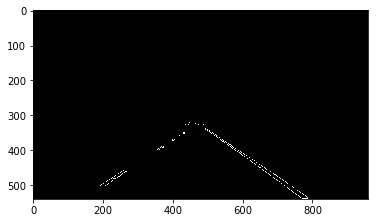

In [46]:
image3 = edge_detection(image2)
plt.imshow(image3, cmap='Greys_r')

### 霍夫线变换

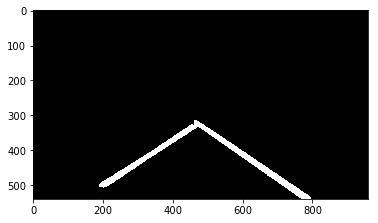

In [73]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2
theta = 1*np.pi/180
threshold = 15
min_line_length = 120
max_line_gap = 100
line_image = np.copy(image3)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(image3, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# # Create a "color" binary image to combine with line image
# color_edges = np.dstack((image3, image3, image3)) 

# # Draw the lines on the edge image
# combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(line_image, cmap='Greys_r')

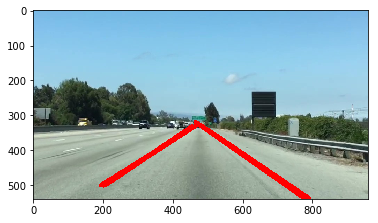

In [76]:
index_l = line_image[:,:]>0
image_copy = np.copy(image)
image_copy[index_l] = [255,0,0]
plt.imshow(image_copy)

In [ ]:
cv2.Rodrigues